In [15]:
import pandas as pd

In [16]:
df_s1 = pd.read_csv("../ABtest/editdata/scenario1_clicklogs.csv")
df_s1

,_id,button,username,timestamp,duration_sec,total_duration_sec,scenario
0,67fc68852560c173d7061929,StartButton - scenario 1,구두자,2025-04-14 01:44:37.025000+00:00,0.000,66.845,scenario 1
1,67fc68922560c173d706192b,공기밥 추가,구두자,2025-04-14 01:44:50.878000+00:00,13.853,66.845,scenario 1
2,67fc689c2560c173d706192d,광운 김밥,구두자,2025-04-14 01:45:00.017000+00:00,9.139,66.845,scenario 1
3,67fc68a12560c173d706192f,결제 버튼,구두자,2025-04-14 01:45:05.065000+00:00,5.048,66.845,scenario 1
4,67fc68c32560c173d7061931,no,구두자,2025-04-14 01:45:39.594000+00:00,34.529,66.845,scenario 1
5,67fc68c72560c173d7061933,결제 버튼,구두자,2025-04-14 01:45:43.870000+00:00,4.276,66.845,scenario 1
6,67fc63da2560c173d70618eb,StartButton - scenario 1,박정현,2025-04-14 01:24:42.990000+00:00,0.000,26.836,scenario 1
7,67fc63df2560c173d70618ed,돈까스,박정현,2025-04-14 01:24:47.983000+00:00,4.993,26.836,scenario 1
8,67fc63e12560c173d70618ef,돈까스,박정현,2025-04-14 01:24:49.628000+00:00,1.645,26.836,scenario 1
9,67fc63e82560c173d70618f1,결제 버튼,박정현,2025-04-14 01:24:56.613000+00:00,6.985,26.836,scenario 1


In [ ]:
df_s1["timestamp"] = pd.to_datetime(df_s1["timestamp"])
df_s1 = df_s1.sort_values(by=["username", "timestamp"])
df_s1

# 사용자별로 처리
def get_first_response_and_time(user_df):
    user_df = user_df.reset_index(drop=True)
    for i in range(len(user_df) - 1):
        curr_btn = user_df.loc[i, "button"]
        next_btn = user_df.loc[i + 1, "button"]
        
        if curr_btn == "결제 버튼" and next_btn in ["yes", "no"]:
            time_diff = (user_df.loc[i + 1, "timestamp"] - user_df.loc[i, "timestamp"]).total_seconds()
            return pd.Series([next_btn, time_diff])
    return pd.Series(["응답 없음", None])

# 그룹별 적용
results = df_s1.groupby("username").apply(get_first_response_and_time).reset_index()
results.columns = ["username", "결제 응답", "응답까지 걸린 시간 (초)"]
results
# yes / no만 필터링
filtered = results[results["결제 응답"].isin(["yes", "no"])]

# 응답별 count와 평균 시간 계산
summary_s1 = (
    filtered.groupby("결제 응답")["응답까지 걸린 시간 (초)"]
    .agg(응답수="count", 평균시간="mean")
    .reset_index()
)

# 시나리오 레이블 추가
summary_s1["시나리오"] = "scenario 1"

# 결과 출력
summary_s1


C:\Users\82103\AppData\Local\Temp\ipykernel_16768\527698677.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = df_s1.groupby("username").apply(get_first_response_and_time).reset_index()


,username,결제 응답,응답까지 걸린 시간 (초)
0,구두자,no,34.529
1,박정현,no,6.409
2,박춘악,yes,21.536
3,오연회,no,40.984
4,이미령,yes,4.135
5,이순자,yes,16.647
6,이옥순,no,2.770
7,조상동,yes,61.377
8,최미화,no,16.275
9,한정수,yes,19.194


In [12]:
df_s2 = pd.read_csv("../ABtest/editdata/scenario2_clicklogs.csv")
df_s2

,_id,button,username,timestamp,duration_sec,total_duration_sec,scenario
0,67fc6f532560c173d706196f,StartButton - scenario 2,김인복,2025-04-14 02:13:39.068000+00:00,0.000,26.568,scenario 2
1,67fc6f5d2560c173d7061971,된장찌개,김인복,2025-04-14 02:13:49.122000+00:00,10.054,26.568,scenario 2
2,67fc6f632560c173d7061973,결제 버튼,김인복,2025-04-14 02:13:55.394000+00:00,6.272,26.568,scenario 2
3,67fc6f6a2560c173d7061975,no,김인복,2025-04-14 02:14:02.001000+00:00,6.607,26.568,scenario 2
4,67fc6f6d2560c173d7061977,결제 버튼,김인복,2025-04-14 02:14:05.636000+00:00,3.635,26.568,scenario 2
5,67fc6e772560c173d7061965,StartButton - scenario 2,서정열,2025-04-14 02:09:59.248000+00:00,0.000,39.006,scenario 2
6,67fc6e892560c173d7061967,순두부찌개,서정열,2025-04-14 02:10:17.241000+00:00,17.993,39.006,scenario 2
7,67fc6e912560c173d7061969,결제 버튼,서정열,2025-04-14 02:10:25.761000+00:00,8.520,39.006,scenario 2
8,67fc6e9a2560c173d706196b,no,서정열,2025-04-14 02:10:34.527000+00:00,8.766,39.006,scenario 2
9,67fc6e9e2560c173d706196d,결제 버튼,서정열,2025-04-14 02:10:38.254000+00:00,3.727,39.006,scenario 2


In [ ]:
df_s2["timestamp"] = pd.to_datetime(df_s2["timestamp"])
df_s2 = df_s2.sort_values(by=["username", "timestamp"])

# 사용자별로 처리
def get_first_response_and_time(user_df):
    user_df = user_df.reset_index(drop=True)
    for i in range(len(user_df) - 1):
        curr_btn = user_df.loc[i, "button"]
        next_btn = user_df.loc[i + 1, "button"]
        
        if curr_btn == "결제 버튼" and next_btn in ["yes", "no"]:
            time_diff = (user_df.loc[i + 1, "timestamp"] - user_df.loc[i, "timestamp"]).total_seconds()
            return pd.Series([next_btn, time_diff])
    return pd.Series(["응답 없음", None])


# 사용자별 결과 계산
results_s2 = df_s2.groupby("username").apply(get_first_response_and_time).reset_index()
results_s2.columns = ["username", "결제 응답", "응답까지 걸린 시간 (초)"]

# yes / no만 필터링
filtered = results_s2[results_s2["결제 응답"].isin(["yes", "no"])]

# 응답별 count와 평균 시간 계산
summary_s2 = (
    filtered.groupby("결제 응답")["응답까지 걸린 시간 (초)"]
    .agg(응답수="count", 평균시간="mean")
    .reset_index()
)

# 시나리오 레이블 추가
summary_s2["시나리오"] = "scenario 2"

# 결과 출력
summary_s2

C:\Users\82103\AppData\Local\Temp\ipykernel_16768\1279602155.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results_s2 = df_s2.groupby("username").apply(get_first_response_and_time).reset_index()


,username,결제 응답,응답까지 걸린 시간 (초)
0,김인복,no,6.607
1,서정열,no,8.766
2,송윤희,yes,6.804
3,유기석,yes,5.418
4,이명숙,yes,13.177
5,이영희,no,42.891
6,이오범,no,9.525
7,이후남,no,11.113
8,조영애,no,4.188
9,차춘자,no,26.006


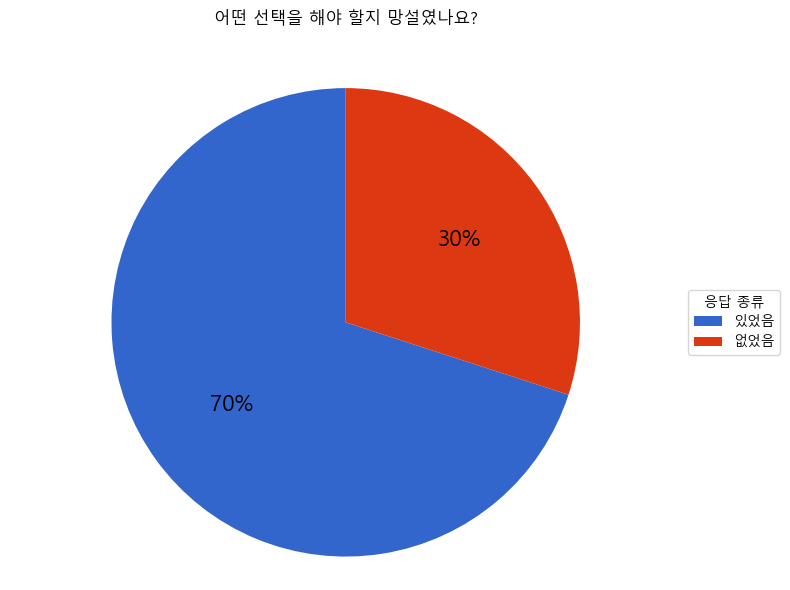

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 불러오기
df_s1_post = pd.read_csv("../ABtest/editdata/scenario1_post_test.csv")
df_s2_post = pd.read_csv("../ABtest/editdata/scenario2_post_test.csv")

# 질문 항목
question_col = "어떤 선택을 해야 할지 망설이거나 주저한 순간이 있었나요?"

# 전체 응답 시리즈 합치기
all_responses = pd.concat([df_s1_post[question_col], df_s2_post[question_col]])

def simplify_response(text):
    if pd.isna(text):
        return "있었음"  # 기타 포함해서 전부 '있었음' 처리
    elif "있었음" in text:
        return "있었음"
    elif "없었음" in text:
        return "없었음"
    else:
        return "있었음"  # 그 외도 전부 '있었음'

# 변환 및 집계
simplified = all_responses.apply(simplify_response)
counts = simplified.value_counts()

# ✅ 쨍한 색상 (파랑=없었음 / 빨강=있었음 순서로)
colors = ['#3366cc', '#dc3912']  # 없었음, 있었음
labels = ['있었음', '없었음']

# 파이 차트 그리기
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    counts,
    autopct='%1.0f%%',
    startangle=90,
    colors=colors,
    textprops=dict(color="black")
)

# 퍼센트 글자 크기 조정
for autotext in autotexts:
    autotext.set_fontsize(16)  # 원하는 크기로 설정 (예: 16)

# 범례 표시
ax.legend(
    wedges,
    labels,
    title="응답 종류",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# 제목
plt.title("어떤 선택을 해야 할지 망설였나요?", pad=30)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [50]:
df_s2_post = pd.read_csv("../ABtest/editdata/scenario2_post_test.csv")
df_s2_post = df["경고나 안내 덕분에 더 정확한 선택을 할 수 있었다고 느끼셨나요?"]
# 각 응답 항목의 비율(%) 계산
percentage = df_s2_post.value_counts(normalize=True) * 100

# 소수점 1자리로 반올림
percentage = percentage.round(1)

print(percentage)

경고나 안내 덕분에 더 정확한 선택을 할 수 있었다고 느끼셨나요?
도움이 되었음    90.0
잘 모르겠음     10.0
Name: proportion, dtype: float64
